# Boosting

In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline


### Import MNIST Train and Test Data

In [3]:
mnist_train_df = pd.read_csv('train.csv', header=None).T
mnist_test_df = pd.read_csv('test.csv', header=None).T
last_column = mnist_test_df.columns[-1]
mnist_train_df.rename(columns={last_column:'Class'}, inplace=True)
mnist_test_df.rename(columns={last_column:'Class'}, inplace=True)

mnist_train_labels = mnist_train_df['Class']
mnist_test_labels = mnist_test_df['Class']

X_mnist_train = mnist_train_df.drop('Class',axis=1)
y_mnist_train = mnist_train_labels

X_mnist_test = mnist_test_df.drop('Class',axis=1)
y_mnist_test = mnist_test_labels
X_mnist_train.shape

(24217, 784)

### Run PCA


In [4]:
pca = PCA(n_components=20)
X_mnist_train_pca = pca.fit_transform(X_mnist_train)
mnist_train_df_pca = pd.DataFrame(X_mnist_train_pca)
mnist_train_df_pca['Class'] = y_mnist_train
X_mnist_train_pca = mnist_train_df_pca.drop('Class',axis=1)


X_mnist_test_pca = pca.fit_transform(X_mnist_test)
mnist_test_df_pca = pd.DataFrame(X_mnist_test_pca)
mnist_test_df_pca['Class'] = y_mnist_test
X_mnist_test_pca = mnist_test_df_pca.drop('Class',axis=1)

## Single iteration of AdaBoost

In [5]:
X = X_mnist_train_pca;    
y = y_mnist_train;
num_iterations = 10;
n, _ = X.shape
K = len(np.unique(y))

### Initialize sample weights

In [6]:
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

### Fit the decision tree

In [7]:
decision_tree = DecisionTreeClassifier(max_depth=1)
decision_tree.fit(X, y, sample_weight=sample_weight)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Predict

In [8]:
y_pred = decision_tree.predict(X)

### Find incorrectly classified samples.   

In [9]:
misclassified = (y_pred != y)

### Compute Error

In [22]:
err_train = np.average(misclassified, weights=sample_weight, axis=0)
print "Iteration#: 1" " Per classifier error: ", err_train    

Iteration#: 1 Per classifier error:  0.947368421053


### Compute new alphas given error

In [11]:
alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)


### Update sample weights given alpha and normalize it

In [12]:
for i in range(n):
    if misclassified[i]: 
        sample_weight[i] *= np.exp(alpha)            

# Re-normalize weights
sample_weight_sum = sample_weight.sum(dtype=np.float64)          
sample_weight = sample_weight / sample_weight_sum


### Run n iterations of AdaBoost

In [25]:
X = X_mnist_train_pca;    
y = y_mnist_train;
num_iterations = 10;
n, _ = X.shape
K = len(np.unique(y))
    
errors = np.zeros(num_iterations, dtype=np.float)
    
# Initialize weights to 1 / n_samples
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

max_depth = 1;

for iteration in range(num_iterations):    
    
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit decision tree
    decision_tree.fit(X, y, sample_weight=sample_weight)
    y_pred = decision_tree.predict(X)
        
    # Find incorrectly classified samples.   
    misclassified = (y_pred != y)
        
    # Error
    err_train = np.average(misclassified, weights=sample_weight, axis=0)
    print "Iteration#: ",iteration, " Per Classifier Error: ", err_train    
      
    # Boost weight using AdaBoost SAMME algo
    alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)
        
    # Set sample weight
    for i in range(n):
        if misclassified[i]: 
            sample_weight[i] *= np.exp(alpha)            

    # Re-normalize weights
    sample_weight_sum = sample_weight.sum(dtype=np.float64)          
    sample_weight = sample_weight / sample_weight_sum
        
    errors[iteration] = err_train  

Iteration#:  0  Per Classifier Error:  0.485485402816
Iteration#:  1  Per Classifier Error:  0.394360806328
Iteration#:  2  Per Classifier Error:  0.471177638217
Iteration#:  3  Per Classifier Error:  0.50687307565
Iteration#:  4  Per Classifier Error:  0.45095932391
Iteration#:  5  Per Classifier Error:  0.481818679768
Iteration#:  6  Per Classifier Error:  0.581243153824
Iteration#:  7  Per Classifier Error:  0.575940849687
Iteration#:  8  Per Classifier Error:  0.528114603845
Iteration#:  9  Per Classifier Error:  0.566775605382


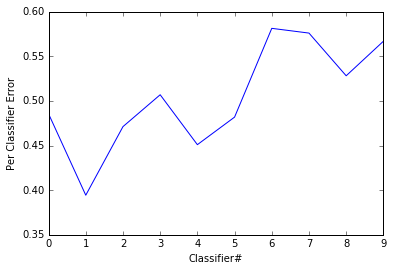

In [26]:
err_plot = plt.plot(errors)
plt.ylabel('Per Classifier Error');
plt.xlabel('Classifier#')
plt.show()


In [27]:
 
errors_depth_10 = np.zeros(num_iterations, dtype=np.float)
    
# Initialize weights to 1 / n_samples
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

max_depth = 10;

for iteration in range(num_iterations):    
    
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit decision tree
    decision_tree.fit(X, y, sample_weight=sample_weight)
    y_pred = decision_tree.predict(X)
        
    # Find incorrectly classified samples.   
    misclassified = (y_pred != y)
        
    # Error
    err_train = np.average(misclassified, weights=sample_weight, axis=0)
    print "Iteration#: ",iteration, " Per Classifier Error: ", err_train    
      
    # Boost weight using AdaBoost SAMME algo
    alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)
        
    # Set sample weight
    for i in range(n):
        if misclassified[i]: 
            sample_weight[i] *= np.exp(alpha)            

    # Re-normalize weights
    sample_weight_sum = sample_weight.sum(dtype=np.float64)          
    sample_weight = sample_weight / sample_weight_sum
        
    errors_depth_10[iteration] = err_train  

Iteration#:  0  Per Classifier Error:  0.0378246686212
Iteration#:  1  Per Classifier Error:  0.0596913513092
Iteration#:  2  Per Classifier Error:  0.0669017895121
Iteration#:  3  Per Classifier Error:  0.0285799750723
Iteration#:  4  Per Classifier Error:  0.091411318372
Iteration#:  5  Per Classifier Error:  0.0446448024256
Iteration#:  6  Per Classifier Error:  0.0808775799491
Iteration#:  7  Per Classifier Error:  0.0469248688659
Iteration#:  8  Per Classifier Error:  0.0264079975246
Iteration#:  9  Per Classifier Error:  0.0447877139358


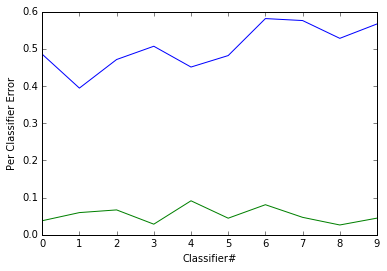

In [28]:
error1 = plt.plot(errors, label='Depth=1');
error2 = plt.plot(errors_depth_10, label='Depth=10');
plt.ylabel('Per Classifier Error');
plt.xlabel('Classifier#')
plt.show()

# Office dataset

### Import Office Train and Test Data

In [32]:
office_train_df = pd.read_csv('office_train.csv', header=None)
office_test_df = pd.read_csv('office_test.csv', header=None)
label = office_test_df.columns[-1]
segment = office_test_df.columns[-2]
image = office_test_df.columns[-3]
office_train_df.rename(columns={label:'Class', segment: 'Segment', image:'Image' }, inplace=True)
office_test_df.rename(columns={label:'Class', segment: 'Segment', image:'Image'}, inplace=True)

office_test_labels = office_test_df['Class']
X_office_train = office_train_df.drop(['Class','Segment','Image'] ,axis=1)
y_office_train  = office_train_df['Class']
X_office_test = office_test_df.drop(['Class','Segment','Image'] ,axis=1)
y_office_test  = office_test_df['Class']                              

### Run PCA


In [33]:
pca = PCA(n_components=20)
X_office_train_pca = pca.fit_transform(X_office_train)
office_train_df_pca = pd.DataFrame(X_office_train_pca)
office_train_df_pca['Class'] = y_office_train
X_office_train_pca = office_train_df_pca.drop('Class',axis=1)


X_office_test_pca = pca.fit_transform(X_office_test)
office_test_df_pca = pd.DataFrame(X_office_test_pca)
office_test_df_pca['Class'] = y_office_test
X_office_test_pca = office_test_df_pca.drop('Class',axis=1)

### Run n iterations of AdaBoost

In [ ]:
X = X_office_train_pca;    
y = y_office_train;
num_iterations = 10;
n, _ = X.shape
K = len(np.unique(y))
    
errors = np.zeros(num_iterations, dtype=np.float)

# Initialize weights to 1 / n_samples
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

max_depth = 1;

for iteration in range(num_iterations):    
    
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit decision tree
    decision_tree.fit(X, y, sample_weight=sample_weight)
    y_pred = decision_tree.predict(X)
        
    # Find incorrectly classified samples.   
    misclassified = (y_pred != y)
        
    # Error
    err_train = np.average(misclassified, weights=sample_weight, axis=0)
    print "Iteration#: ",iteration, " Per Classifier Error: ", err_train
    
      
    # Boost weight using AdaBoost SAMME algo
    alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)
        
    # Set sample weight
    for i in range(n):
        if misclassified[i]: 
            sample_weight[i] *= np.exp(alpha)            

    # Re-normalize weights
    sample_weight_sum = sample_weight.sum(dtype=np.float64)          
    sample_weight = sample_weight / sample_weight_sum
        
    errors[iteration] = err_train  


In [36]:
errors_depth_10 = np.zeros(num_iterations, dtype=np.float)

# Initialize weights to 1 / n_samples
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

max_depth = 10;

for iteration in range(num_iterations):    
    
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit decision tree
    decision_tree.fit(X, y, sample_weight=sample_weight)
    y_pred = decision_tree.predict(X)
        
    # Find incorrectly classified samples.   
    misclassified = (y_pred != y)
        
    # Error
    err_train = np.average(misclassified, weights=sample_weight, axis=0)
    print "Iteration#: ",iteration, " Per Classifier Error: ", err_train 
      
    # Boost weight using AdaBoost SAMME algo
    alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)
        
    # Set sample weight
    for i in range(n):
        if misclassified[i]: 
            sample_weight[i] *= np.exp(alpha)            

    # Re-normalize weights
    sample_weight_sum = sample_weight.sum(dtype=np.float64)          
    sample_weight = sample_weight / sample_weight_sum
        
    errors_depth_10[iteration] = err_train  


 Iteration#:  0  Per Classifier Error:  0.333496005243
Iteration#:  1  Per Classifier Error:  0.446355903643
Iteration#:  2  Per Classifier Error:  0.523404601571
Iteration#:  3  Per Classifier Error:  0.548269988383
Iteration#:  4  Per Classifier Error:  0.554413900169
Iteration#:  5  Per Classifier Error:  0.537084852309
Iteration#:  6  Per Classifier Error:  0.528972376991
Iteration#:  7  Per Classifier Error:  0.545798419931
Iteration#:  8  Per Classifier Error:  0.558466581284
Iteration#:  9  Per Classifier Error:  0.55993989738


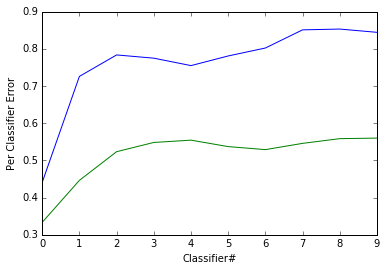

In [37]:
error1 = plt.plot(errors, label='Depth=1');
error2 = plt.plot(errors_depth_10, label='Depth=10');

plt.ylabel('Per Classifier Error');
plt.xlabel('Classifier#')
plt.show()